#**SkillifyZone Internship Week 01 Task**
#**Submitted By: Muhammad Usman**

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## **Step 01: Load and Clean the Dataset**

In [26]:
df = pd.read_csv('/content/Superstore.csv', encoding='latin1')
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [27]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [28]:
# Fill missing numerical values (Sales, Quantity, Discount, Profit) with median
for col in ['Sales', 'Quantity', 'Discount', 'Profit']:
    df[col] = df[col].fillna(df[col].median())
#Fill missing categorical values (e.g., Category, Sub-Category, Region, Segment) with mode
for col in ['Category', 'Sub-Category', 'Region', 'Segment', 'Ship Mode', 'Customer ID', 'Customer Name', 'Country', 'City', 'State', 'Product ID', 'Product Name']:
    df[col] = df[col].fillna(df[col].mode()[0])
# Handle missing Postal Code (numerical but treat as categorical for simplicity)
df['Postal Code'] = df['Postal Code'].fillna(df['Postal Code'].mode()[0])

In [29]:
# Parse dates
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')
# Extract year and month for time-based analysis
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

In [30]:
# Verify cleaning
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())


Missing Values After Cleaning:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Year             0
Month            0
dtype: int64


## **Step 02: Exploratory Analysis**

In [31]:
# Sales and Profit by Category
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
category_profit = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)

In [32]:
#  Sales and Profit by Region
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
region_profit = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)

In [33]:
#Sales by Sub-Category
subcategory_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)

In [34]:
# Time-based analysis: Sales trend over time
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
monthly_sales['Date'] = monthly_sales.apply(lambda x: datetime(int(x['Year']), int(x['Month']), 1), axis=1)

## **Step 03: Visualize Insights**

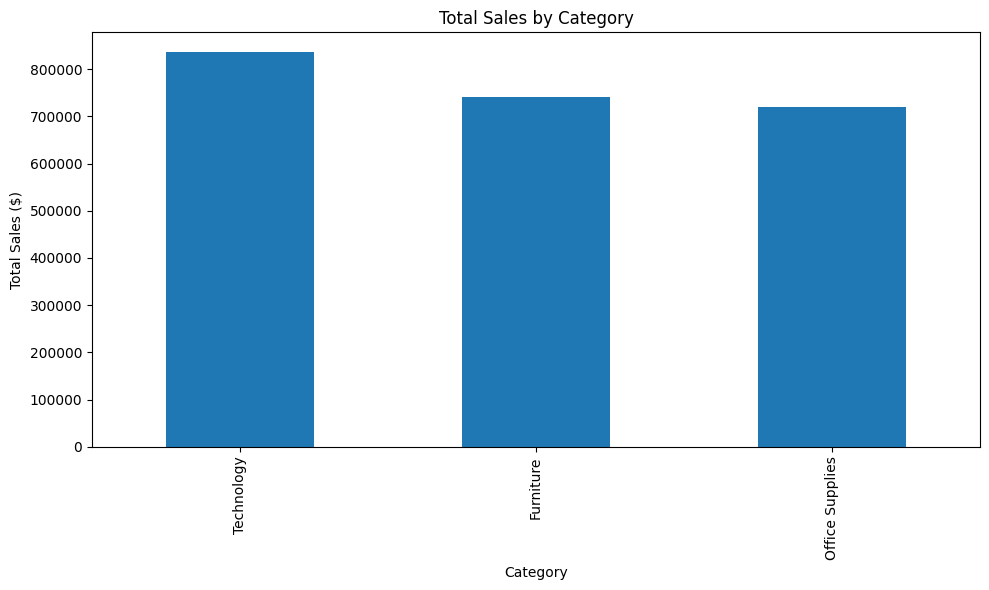

In [35]:
# Insight 1: Which category sells best? (Bar Chart)
plt.figure(figsize=(10, 6))
category_sales.plot(kind='bar')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales ($)')
plt.tight_layout()
plt.savefig('category_sales.png')
plt.show()

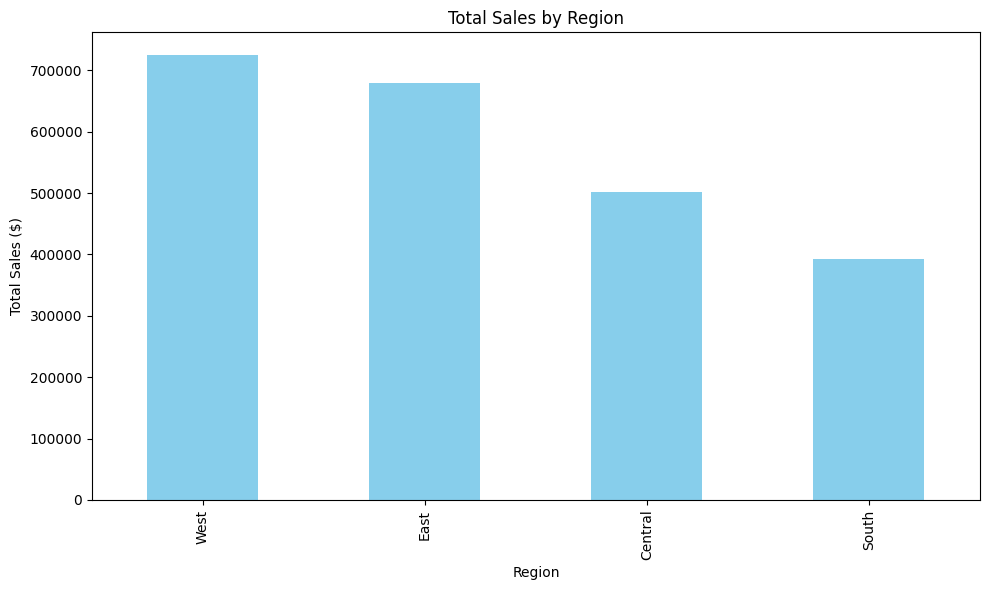

In [36]:
# Insight 2: Which region earns the most? (Bar Chart)
plt.figure(figsize=(10, 6))
region_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales ($)')
plt.tight_layout()
plt.savefig('region_sales.png')
plt.show()

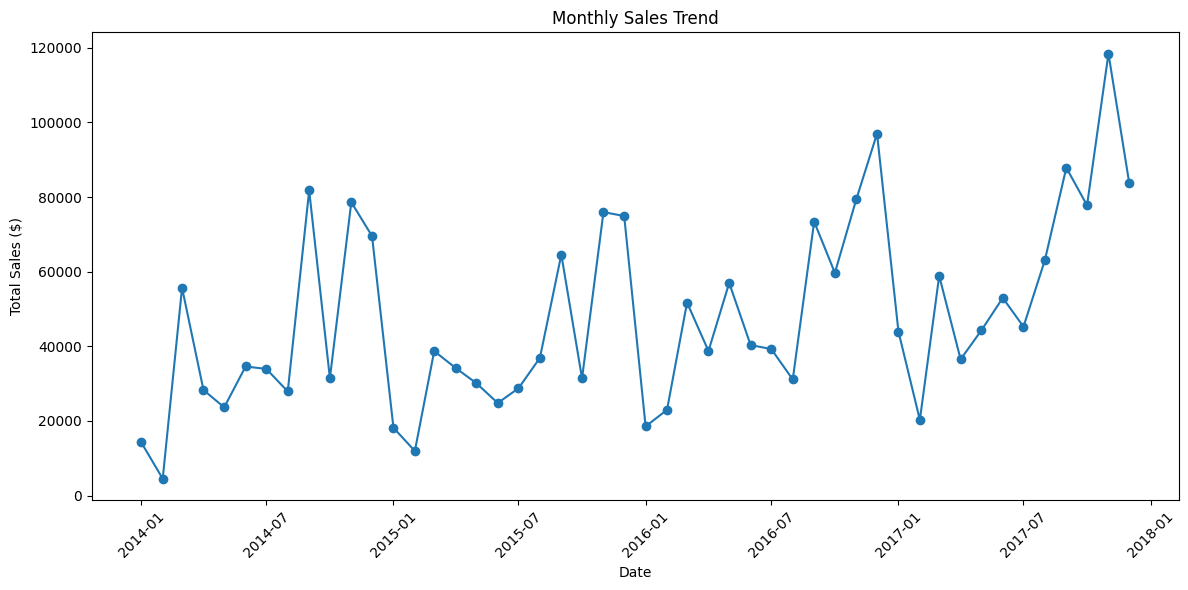

In [37]:
# Insight 3: Sales trend over time (Line Graph)
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Date'], monthly_sales['Sales'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('monthly_sales_trend.png')
plt.show()

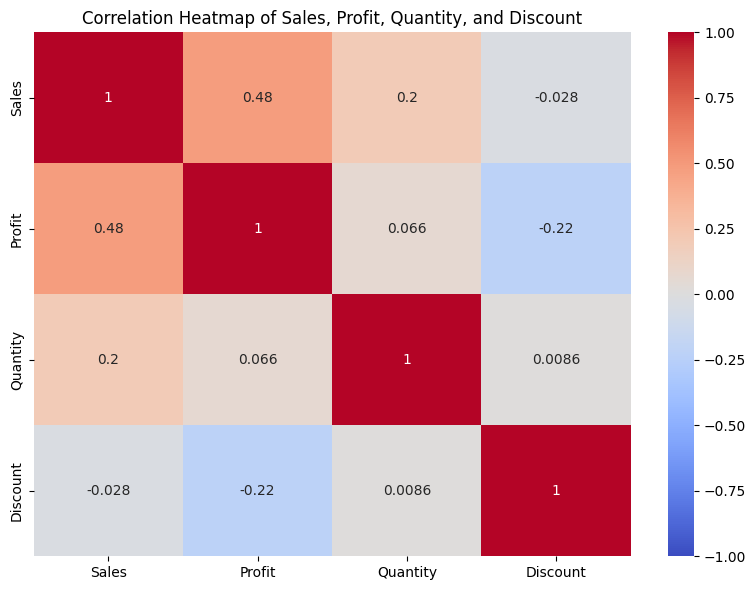

In [38]:
# Insight 4: Correlation between Sales, Profit, Quantity, and Discount (Heatmap)
plt.figure(figsize=(8, 6))
corr = df[['Sales', 'Profit', 'Quantity', 'Discount']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Sales, Profit, Quantity, and Discount')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()

<Figure size 1200x600 with 0 Axes>

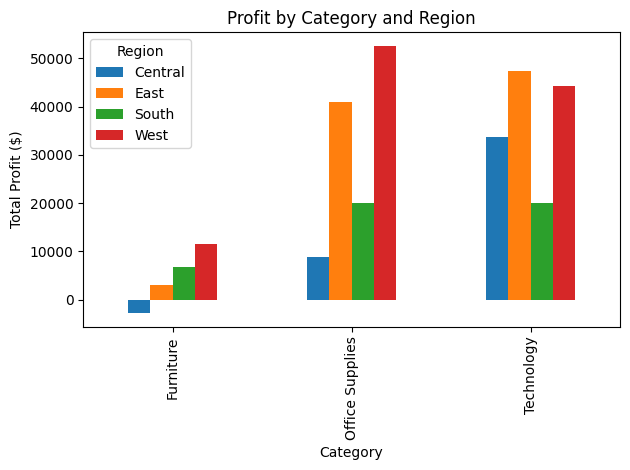

In [39]:
# Insight 5: Profit by Category and Region (Grouped Bar Chart)
pivot_profit = df.pivot_table(values='Profit', index='Category', columns='Region', aggfunc='sum')
plt.figure(figsize=(12, 6))
pivot_profit.plot(kind='bar', stacked=False)
plt.title('Profit by Category and Region')
plt.xlabel('Category')
plt.ylabel('Total Profit ($)')
plt.legend(title='Region')
plt.tight_layout()
plt.savefig('profit_by_category_region.png')
plt.show()

## **Step 04: Present Key Insights**

In [23]:
print("\nKey Insights:")
print("1. Best-Selling Category: The '{}' category has the highest sales at ${:,.2f}.".format(
    category_sales.index[0], category_sales.iloc[0]))
print("2. Top Region by Sales: The '{}' region leads with total sales of ${:,.2f}.".format(
    region_sales.index[0], region_sales.iloc[0]))
print("3. Top Sub-Category: The '{}' sub-category has the highest sales at ${:,.2f}.".format(
    subcategory_sales.index[0], subcategory_sales.iloc[0]))
print("4. Sales Trend: Sales show {} over time (see monthly_sales_trend.png).".format(
    "seasonal patterns" if monthly_sales['Sales'].std() > monthly_sales['Sales'].mean() * 0.3 else "steady growth"))
print("5. Sales-Profit Correlation: Sales and Profit have a correlation of {:.2f} (see correlation_heatmap.png).".format(
    corr.loc['Sales', 'Profit']))


Key Insights:
1. Best-Selling Category: The 'Technology' category has the highest sales at $836,154.03.
2. Top Region by Sales: The 'West' region leads with total sales of $725,457.82.
3. Top Sub-Category: The 'Phones' sub-category has the highest sales at $330,007.05.
4. Sales Trend: Sales show seasonal patterns over time (see monthly_sales_trend.png).
5. Sales-Profit Correlation: Sales and Profit have a correlation of 0.48 (see correlation_heatmap.png).
